## **GENERATE SAMPLE INTERN SKILLS AND JOB DESCRIPTION DATA**

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

intern_skills_data = {
    'Intern_ID': ['INT001', 'INT002', 'INT003', 'INT004', 'INT005', 'INT006', 'INT007', 'INT008', 'INT009', 'INT010'],
    'Name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee', 'Diana Brown', 'Eve Davis', 'Frank Wilson', 'Grace Kim', 'Henry Patel', 'Isabel Garcia', 'Jack Chen'],
    'Skills': [
        'Python, Data Analysis, Excel, Basic Machine Learning, Pandas',
        'Java, SQL, Database Management, Basic Python, Git',
        'Python, Web Development, HTML, CSS, JavaScript, React',
        'R, Statistics, Data Visualization, Excel, Tableau',
        'Python, Basic Machine Learning, SQL, Tableau, Numpy',
        'Python, Django, PostgreSQL, REST API, Docker',
        'JavaScript, Node.js, MongoDB, Web Development, Express.js',
        'Python, Machine Learning, Scikit-learn, Data Analysis, Linux',
        'R, SQL, Power BI, Statistics, Data Cleaning',
        'C++, Python, Algorithms, Data Structures, Cloud Computing'
    ],
    'Proficiency_Level': [
        'Intermediate, Intermediate, Advanced, Beginner, Intermediate',
        'Advanced, Intermediate, Intermediate, Beginner, Intermediate',
        'Intermediate, Advanced, Advanced, Intermediate, Intermediate, Beginner',
        'Advanced, Advanced, Intermediate, Advanced, Intermediate',
        'Intermediate, Beginner, Intermediate, Intermediate, Intermediate',
        'Advanced, Intermediate, Intermediate, Intermediate, Beginner',
        'Intermediate, Intermediate, Intermediate, Advanced, Intermediate',
        'Advanced, Intermediate, Advanced, Intermediate, Beginner',
        'Intermediate, Intermediate, Intermediate, Advanced, Intermediate',
        'Advanced, Intermediate, Advanced, Advanced, Beginner'
    ]
}
industry_jobs_data = {
    'Job_ID': ['JOB001', 'JOB002', 'JOB003', 'JOB004', 'JOB005'],
    'Role': ['Data Scientist', 'Software Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Full Stack Developer'],
    'Required_Skills': [
        'Python, Machine Learning, Deep Learning, SQL, Data Visualization, Statistics, Big Data, TensorFlow',
        'Java, Python, JavaScript, Web Development, Database Management, Cloud Computing, Docker, Git',
        'Python, R, SQL, Excel, Data Visualization, Statistics, Tableau, Power BI',
        'Python, Machine Learning, Deep Learning, Scikit-learn, TensorFlow, PyTorch, Big Data, Linux',
        'JavaScript, React, Node.js, Python, Django, MongoDB, REST API, Cloud Computing'
    ],
    'Experience_Level': ['Mid-Senior', 'Mid-Senior', 'Entry-Mid', 'Mid-Senior', 'Mid-Senior']
}
intern_job_preferences_data = {
    'Intern_ID': [
        'INT001', 'INT001', 'INT002', 'INT002', 'INT003', 'INT003', 'INT004', 'INT004', 'INT005', 'INT005',
        'INT006', 'INT006', 'INT007', 'INT007', 'INT008', 'INT008', 'INT009', 'INT009', 'INT010', 'INT010'
    ],
    'Job_ID': [
        'JOB001', 'JOB003', 'JOB002', 'JOB003', 'JOB003', 'JOB005', 'JOB001', 'JOB003', 'JOB001', 'JOB003',
        'JOB004', 'JOB005', 'JOB005', 'JOB003', 'JOB001', 'JOB004', 'JOB003', 'JOB001', 'JOB002', 'JOB004'
    ]
}


## **PREPROCESSING BEFORE USING NLP(TF-IDF) AND CLUSTERING**

In [11]:
intern_df = pd.DataFrame(intern_skills_data)
industry_df = pd.DataFrame(industry_jobs_data)
intern_job_preferences_df = pd.DataFrame(intern_job_preferences_data)

intern_df['Skills'] = intern_df['Skills'].str.lower().str.split(', ')
intern_df['Proficiency_Level'] = intern_df['Proficiency_Level'].str.lower().str.split(', ')
industry_df['Required_Skills'] = industry_df['Required_Skills'].str.lower().str.split(', ')

for idx, row in intern_df.iterrows():
    if len(row['Skills']) != len(row['Proficiency_Level']):
        print(f"Mismatch in skills and proficiency lengths for {row['Intern_ID']}")
        exit()

intern_df['Skills_Proficiency'] = intern_df.apply(
    lambda row: dict(zip(row['Skills'], row['Proficiency_Level'])), axis=1
)

## **USING NLP AND CLUSTEING TO ANALYSE SKILLS GAP**


=== TF-IDF Vocabulary (Unique Skills) ===


,Skill
0,algorithms
1,analysis
2,api
3,basic
4,bi
5,big
6,cleaning
7,cloud
8,computing
9,css



=== Intern Skill Clusters ===


,Cluster,Intern_ID,Name,Skills
0,0,INT004,Diana Brown,"r, statistics, data visualization, excel, tableau"
1,0,INT007,Grace Kim,"javascript, node.js, mongodb, web development, express.js"
2,0,INT009,Isabel Garcia,"r, sql, power bi, statistics, data cleaning"
3,1,INT001,Alice Smith,"python, data analysis, excel, basic machine learning, pandas"
4,1,INT008,Henry Patel,"python, machine learning, scikit-learn, data analysis, linux"
5,1,INT010,Jack Chen,"c++, python, algorithms, data structures, cloud computing"
6,2,INT002,Bob Johnson,"java, sql, database management, basic python, git"
7,2,INT003,Charlie Lee,"python, web development, html, css, javascript, react"
8,2,INT005,Eve Davis,"python, basic machine learning, sql, tableau, numpy"
9,2,INT006,Frank Wilson,"python, django, postgresql, rest api, docker"



=== Skill Gap Analysis for Desired Jobs ===


,Intern_ID,Name,Job_Role,Job_ID,Missing_Skills,Training_Recommendation
1,INT001,Alice Smith,Data Analyst,JOB003,"r, sql, data visualization, statistics, tableau, power bi","Learn r, sql, data visualization, statistics, tableau, power bi"
0,INT001,Alice Smith,Data Scientist,JOB001,"machine learning, deep learning, sql, data visualization, statistics, big data, tensorflow","Learn machine learning, deep learning, sql, data visualization, statistics, big data, tensorflow"
3,INT002,Bob Johnson,Data Analyst,JOB003,"python, r, excel, data visualization, statistics, tableau, power bi","Learn python, r, excel, data visualization, statistics, tableau, power bi"
2,INT002,Bob Johnson,Software Engineer,JOB002,"python, javascript, web development, cloud computing, docker","Learn python, javascript, web development, cloud computing, docker"
4,INT003,Charlie Lee,Data Analyst,JOB003,"r, sql, excel, data visualization, statistics, tableau, power bi","Learn r, sql, excel, data visualization, statistics, tableau, power bi"
5,INT003,Charlie Lee,Full Stack Developer,JOB005,"react, node.js, django, mongodb, rest api, cloud computing","Learn react, node.js, django, mongodb, rest api, cloud computing"
7,INT004,Diana Brown,Data Analyst,JOB003,"python, sql, power bi","Learn python, sql, power bi"
6,INT004,Diana Brown,Data Scientist,JOB001,"python, machine learning, deep learning, sql, big data, tensorflow","Learn python, machine learning, deep learning, sql, big data, tensorflow"
9,INT005,Eve Davis,Data Analyst,JOB003,"r, excel, data visualization, statistics, power bi","Learn r, excel, data visualization, statistics, power bi"
8,INT005,Eve Davis,Data Scientist,JOB001,"machine learning, deep learning, data visualization, statistics, big data, tensorflow","Learn machine learning, deep learning, data visualization, statistics, big data, tensorflow"


/tmp/ipython-input-14-3819261267.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=intern_df, palette='viridis')


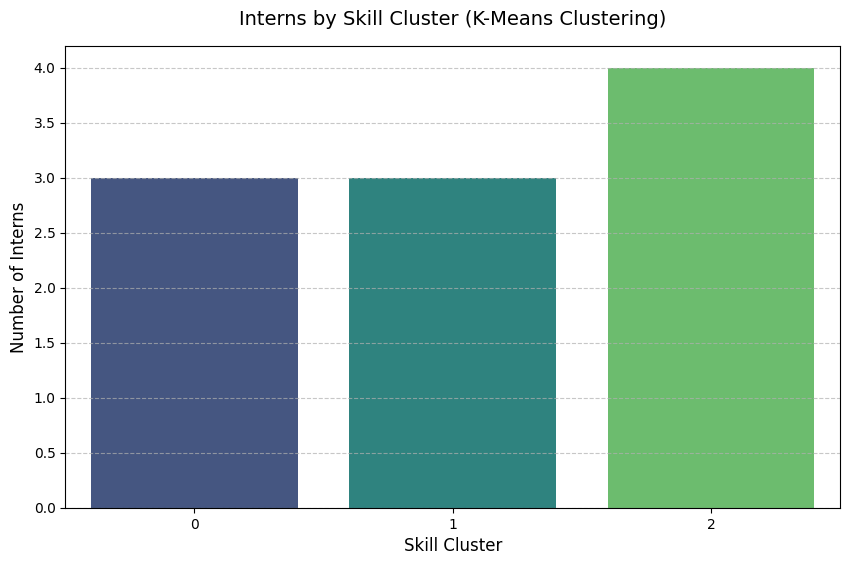

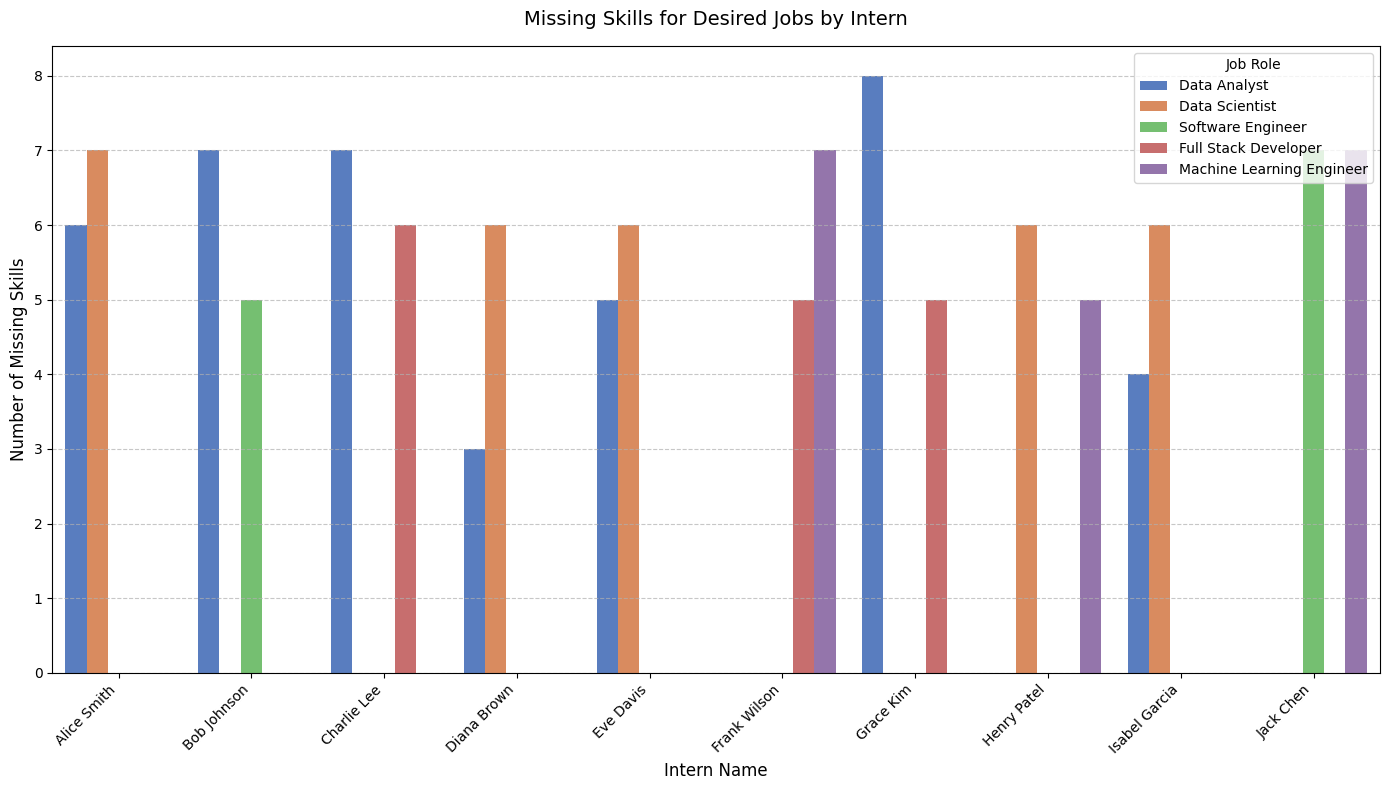


Results saved to 'skill_gap_analysis_centered.csv'


In [14]:
all_skills = [' '.join(skills) for skills in intern_df['Skills']] + [' '.join(skills) for skills in industry_df['Required_Skills']]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_skills)
intern_tfidf = tfidf_matrix[:len(intern_df)]
industry_tfidf = tfidf_matrix[len(intern_df):]

print("\n=== TF-IDF Vocabulary (Unique Skills) ===")
vocab_df = pd.DataFrame(vectorizer.get_feature_names_out(), columns=['Skill'])
display(vocab_df.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
]))

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
intern_clusters = kmeans.fit_predict(intern_tfidf)
intern_df['Cluster'] = intern_clusters

print("\n=== Intern Skill Clusters ===")
cluster_summary = []
for cluster in range(num_clusters):
    cluster_interns = intern_df[intern_df['Cluster'] == cluster][['Intern_ID', 'Name', 'Skills']]
    for _, intern in cluster_interns.iterrows():
        cluster_summary.append({
            'Cluster': cluster,
            'Intern_ID': intern['Intern_ID'],
            'Name': intern['Name'],
            'Skills': ', '.join(intern['Skills'])
        })
cluster_df = pd.DataFrame(cluster_summary)
display(cluster_df[['Cluster', 'Intern_ID', 'Name', 'Skills']].style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
]))

gap_analysis = []
proficiency_map = {'beginner': 1, 'intermediate': 2, 'advanced': 3}
min_level = proficiency_map['intermediate']

for i, intern in intern_df.iterrows():
    intern_prefs = intern_job_preferences_df[intern_job_preferences_df['Intern_ID'] == intern['Intern_ID']]
    for j, job in industry_df.iterrows():
        if job['Job_ID'] in intern_prefs['Job_ID'].values:
            known_skills = [
                skill for skill, prof in intern['Skills_Proficiency'].items()
                if proficiency_map.get(prof, 1) >= min_level
            ]
            missing_skills = [skill for skill in job['Required_Skills'] if skill not in known_skills]
            gap_analysis.append({
                'Intern_ID': intern['Intern_ID'],
                'Name': intern['Name'],
                'Job_Role': job['Role'],
                'Job_ID': job['Job_ID'],
                'Missing_Skills': ', '.join(missing_skills) if missing_skills else 'None',
                'Training_Recommendation': f"Learn {', '.join(missing_skills)}" if missing_skills else 'No training needed'
            })

gap_df = pd.DataFrame(gap_analysis)
gap_df = gap_df.sort_values(['Intern_ID', 'Job_Role'])

print("\n=== Skill Gap Analysis for Desired Jobs ===")
display(gap_df[['Intern_ID', 'Name', 'Job_Role', 'Job_ID', 'Missing_Skills', 'Training_Recommendation']].style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
]))

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=intern_df, palette='viridis')
plt.title('Interns by Skill Cluster (K-Means Clustering)', fontsize=14, pad=15)
plt.xlabel('Skill Cluster', fontsize=12)
plt.ylabel('Number of Interns', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

gap_df['Missing_Skills_Count'] = gap_df['Missing_Skills'].apply(lambda x: len(x.split(', ')) if x != 'None' else 0)
plt.figure(figsize=(14, 8))
sns.barplot(x='Name', y='Missing_Skills_Count', hue='Job_Role', data=gap_df, palette='muted')
plt.title('Missing Skills for Desired Jobs by Intern', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Intern Name', fontsize=12)
plt.ylabel('Number of Missing Skills', fontsize=12)
plt.legend(title='Job Role', loc='upper right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

gap_df.to_csv('skill_gap_analysis_centered.csv', index=False)
print("\nResults saved to 'skill_gap_analysis_centered.csv'")